# CS105 Mini Project (Labs 4 - 5)

In this project, we looked to analyze the amount of hours that Students spent playing Video games and watching streams of Video Games.  We used the data obtained from our questions, along with supporting data from other questions to formulate a series of hypothesis, assumptions, and tests.

## Question 1 - What Data do you have?

Our overall study aimed to primarily ask students the hours they spent playing or watching video games.  While this was the primary focus, we asked additional questions:

* How Many Hours do you spend playing games in a week?
* How Many Hours do you spend watching gaming streams in a week?
* What is the name of the game you play the most?

Along with the data from the questions we asked, we also have used additional data from other groups' questions that we have used to find additional correlations.

## Question 2 - What would you like to know?

* Is there correlation between the amount of people who play games per week and the amount of people who watch people play games per week. 
* Is there correlations in regards to amount of hours spent playing games and other factors?
    * Is there correlation between age and gaming hours? 
    * Is there correlation between gender and gaming hours?
    * Is there correlation between streaming videos and gaming hours?
    * Is there correlation between Seating Position in Class and Time Spent Playing Video Games?

We are mainly curious about what behaviors are common amonst people that play games and if those features scale with the amount of time spent on games.

## Question 3 - Explain what you are computing

Begin our analysis by getting our raw data from `responses.csv`. Proceed to clean data so that our dataframe, `df` has all the relative information we need:
* Columns were renamed for easier readability.
* Numerical Values converted into float type
* Regex checking to ensure that data fits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
from scipy.stats.stats import pearsonr
from scipy.stats import chi2
from scipy.stats import chi2_contingency
import scipy.stats as stats

df = pd.read_csv('responses.csv')

df = df.iloc[:, 74:78]
df = df.rename(columns={'74. How many hours do you play video games in an average week? (PC, console, phone...)': 'HourPlayed', '75. How many hours do you spend watching gaming streams in a week?': 'HourWatched', '76. What genre of games do you play? (Select all that apply)': 'Genre', '77. What is the name of the game you play most?': 'PlayMost'})
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(to_replace=r'[^\d.]+', value='', regex=True)
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(to_replace='', value=0)
df.iloc[:, 0:2] = df.iloc[:, 0:2].replace(np.nan, 0)
df.iloc[:, 2:3] = df.iloc[:, 2:3].fillna('None')
df['HourPlayed'] = df['HourPlayed'].astype(float)
df['HourWatched'] = df['HourWatched'].astype(float)

df.head(20)

HourPlayed  HourWatched  \
0         15.0         10.0   
1          0.0          0.0   
2         20.0          0.0   
3         20.0          8.0   
4          0.0          0.0   
5          0.0          0.0   
6          0.0          0.0   
7          3.0          0.0   
8          0.0          0.0   
9          5.0          0.0   
10        20.0          0.0   
11         5.0          1.0   
12        10.0          0.0   
13         0.0          0.0   
14        10.0          0.0   
15         5.0          3.0   
16         4.0          2.0   
17         5.0          0.0   
18         0.0          0.0   
19         3.0          0.0   

                                                Genre  \
0   FPS, Fighting Games, Gatcha, Single Player Gam...   
1                                                None   
2       Gatcha, Single Player Games, RTS, Phone Games   
3   FPS, Fighting Games, Gatcha, Single Player Gam...   
4                                                None   
5                                                None   
6                                                None   
7                                                MOBA   
8                                         Phone Games   
9                                         Phone Games   
10        MOBA, FPS, Single Player Games, Phone Games   
11                           FPS, Single Player Games   
12          Gatcha, Single Player Games, Rhythm Games   
13  MOBA, FPS, Gatcha, MMORPG, Battle Royale, Phon...   
14  MOBA, FPS, Gatcha, Single Player Games, MMORPG...   
15   MOBA, FPS, Single Player Games, Co-op Games, RTS   
16    MOBA, FPS, Fighting Games, Gatcha, Rhythm Games   
17                          MOBA, Gatcha, Co-op Games   
18                                               None   
19  FPS, Fighting Games, Gatcha, Single Player Gam...   

                     PlayMost  
0                APEX LEGENDS  
1                         NaN  
2                   Azur Lane  
3            Tower of Fantasy  
4                         NaN  
5                         NaN  
6                          Na  
7           League of Legends  
8                      Wordle  
9                Sumikko Farm  
10             Genshin impact  
11                Overwatch 2  
12  Fire Emblem: Three Houses  
13                       Rust  
14        Cookie Run: Kingdom  
15       Europa Universalis 4  
16           Fate/Grand Order  
17                    Genshin  
18                        NaN  
19                    Pokemon

### Initial Data Visualization

In [2]:
hour_play = df.drop(df[df.HourPlayed == 0].index)
fig = px.histogram(hour_play, x='HourPlayed', nbins=60)
fig.show()

In [3]:
violin = df.drop(df[df.HourPlayed == 0].index)
fig = px.violin(violin, y='HourPlayed', box=True, points='all')
fig.show()

In [4]:
hour_watch = df.drop(df[df.HourWatched == 0].index)
fig = px.histogram(hour_watch, x='HourWatched', nbins=30)
fig.show()

In [5]:
violin = df.drop(df[df.HourWatched == 0].index)
fig = px.violin(violin, y='HourWatched', box=True, points='all')
fig.show()

<AxesSubplot:xlabel='HourPlayed', ylabel='HourWatched'>

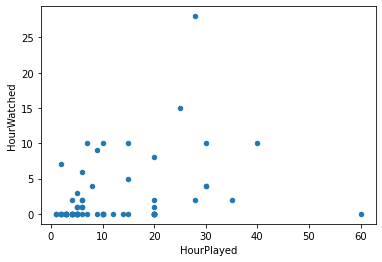

In [6]:
df = df.drop(df[df.HourPlayed == 0].index)
df.plot.scatter(x="HourPlayed", y="HourWatched")

<AxesSubplot:>

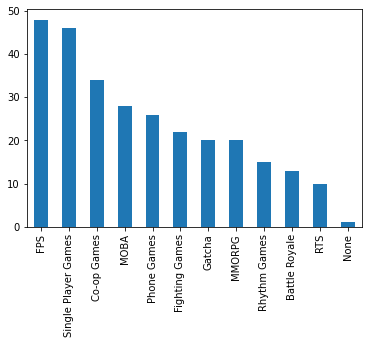

In [7]:
genre_count = df['Genre'].astype(str).str.split(', ').explode().value_counts()
genre_count.plot(kind='bar')


### Correlation between time spent per week streaming videos (YouTube, Netflix, etc.) and amount of time per week spent playing video games

In [8]:
jack_df = pd.read_csv('responses.csv')
streaming = jack_df.iloc[:, 73]
gender = jack_df.iloc[:, 3]
jack_df = jack_df.iloc[:, 74:78]
jack_df = jack_df.rename(columns={'74. How many hours do you play video games in an average week? (PC, console, phone...)': 'HourPlayed', '75. How many hours do you spend watching gaming streams in a week?': 'HourWatched', '76. What genre of games do you play? (Select all that apply)': 'Genre', '77. What is the name of the game you play most?': 'PlayMost'})
jack_df.iloc[:, 0:2] = jack_df.iloc[:, 0:2].replace(to_replace=r'[^\d.]+', value='', regex=True)
jack_df.iloc[:, 0:2] = jack_df.iloc[:, 0:2].replace(to_replace='', value=0)
jack_df.iloc[:, 0:2] = jack_df.iloc[:, 0:2].replace(np.nan, 0)
jack_df.iloc[:, 2:3] = jack_df.iloc[:, 2:3].fillna('None')

jack_df['Streaming'] = streaming.replace(to_replace=r'[^\d.]+', value='', regex=True).replace(to_replace='', value=0).astype('float').dropna()
jack_df['Gender'] = gender
jack_df.head(20)

HourPlayed HourWatched                                              Genre  \
0          15          10  FPS, Fighting Games, Gatcha, Single Player Gam...   
1           0           0                                               None   
2          20           0      Gatcha, Single Player Games, RTS, Phone Games   
3          20           8  FPS, Fighting Games, Gatcha, Single Player Gam...   
4           0           0                                               None   
5           0           0                                               None   
6           0           0                                               None   
7           3           0                                               MOBA   
8           0           0                                        Phone Games   
9           5           0                                        Phone Games   
10         20           0        MOBA, FPS, Single Player Games, Phone Games   
11          5           1                           FPS, Single Player Games   
12         10           0          Gatcha, Single Player Games, Rhythm Games   
13          0           0  MOBA, FPS, Gatcha, MMORPG, Battle Royale, Phon...   
14         10           0  MOBA, FPS, Gatcha, Single Player Games, MMORPG...   
15          5           3   MOBA, FPS, Single Player Games, Co-op Games, RTS   
16          4           2    MOBA, FPS, Fighting Games, Gatcha, Rhythm Games   
17          5           0                          MOBA, Gatcha, Co-op Games   
18          0           0                                               None   
19          3           0  FPS, Fighting Games, Gatcha, Single Player Gam...   

                     PlayMost  Streaming  Gender  
0                APEX LEGENDS       15.0    Male  
1                         NaN       14.0  Female  
2                   Azur Lane       20.0    Male  
3            Tower of Fantasy       15.0    Male  
4                         NaN        5.0  Female  
5                         NaN        4.0  Female  
6                          Na        5.0  Female  
7           League of Legends        3.0    Male  
8                      Wordle       10.0  Female  
9                Sumikko Farm       22.0  Female  
10             Genshin impact       40.0    Male  
11                Overwatch 2       10.0    Male  
12  Fire Emblem: Three Houses       25.0    Male  
13                       Rust       10.0    Male  
14        Cookie Run: Kingdom       10.0    Male  
15       Europa Universalis 4       20.0    Male  
16           Fate/Grand Order       84.0    Male  
17                    Genshin        3.0    Male  
18                        NaN        1.0  Female  
19                    Pokemon       10.0    Male

**__Hypothesis:__** The time spent per week streaming videos such as youtube or netflix will correlate with the amount of time per week spent playing video games.

**__Reasoning__**: We think this is because people that play video games will also watch video games, thus increasing their time spent streaming videos. If this is true, we expect the correlation between hours spend watching games and hours playing games to be similar to the correlation between hours spent streaming videos and hours spent watching because there is an overlap between time spent streaming videos and time spent watching games.

Therefore to test this hypothesis we will use the pearson correlation test because it checks for correlation between continuous numeric variables, which is applicable here as all variables are measured in time.

We will be using the pearson correlation test on hours watching video games and hours playing video games, hours streaming videos and playing video games, and finally hours watching video games and hours streaming videos.

In [9]:
jack_df['HourPlayed']=jack_df['HourPlayed'].astype('float')
jack_df['HourWatched']=jack_df['HourWatched'].astype('float')
impdf = jack_df.dropna(subset = ['Streaming'])
(hpsr, hpsp) = pearsonr(impdf['HourPlayed'], impdf['Streaming'])
(hpwr, hpwp) = pearsonr(impdf['HourPlayed'], impdf['HourWatched'])
(wsr, wsp) = pearsonr(impdf['HourWatched'], impdf['Streaming'])

print('Pearson Correlation Coefficient between hours playing video games per week and hours streaming videos per week: ', \
      round(hpsr, 4))
print('P-value for that correlation: ', f'{hpsp:.5f}')
print('Pearson Correlation Coefficient between hours playing video games per week and hours watching video games per week: ', \
     round(hpwr, 4))
print('P-value for that correlation: ', f'{hpwp:.5f}')
print('Pearson Correlation Coefficient between hours watching video games per week and hours streaming videos per week: ', \
     round(wsr, 4))
print('P-value for that correlation: ', round(wsp, 5))

Pearson Correlation Coefficient between hours playing video games per week and hours streaming videos per week:  0.4314
P-value for that correlation:  0.00001
Pearson Correlation Coefficient between hours playing video games per week and hours watching video games per week:  0.4227
P-value for that correlation:  0.00001
Pearson Correlation Coefficient between hours watching video games per week and hours streaming videos per week:  0.3703
P-value for that correlation:  0.00013


**__Conclusion:__** It appears that our hypothesis was correct! 

Notice the correlation between hours playing games and hours streaming videos is similar to the correlation between hours playing video games and hours watching video games. This means that hours playing games is about equal in predicting the hours spent streaming videos and also hours spent watching video games. This lines up with our hypothesis, I would argue that this is due to the overlap between watching games and streaming videos.

Since the correlation coefficients of the two correlations are about `0.43`, we argue that there is a weak-moderate correlation between the hours playing video games to both hours streaming videos and hours watching video games.

The final part of this is to test whether the hours spent watching video games is correlated to the hours spent streaming videos. We got a pearson correlation coefficient of `0.37`, which is lower than the previous coefficients. This means that the overlap between the hours streaming and hours watching video games is not more significant than the fact that people who play more video games also stream more videos in general.

This would mean that people who play more video games also stream more videos, which could be used to imply that people who play more video games spend a lot more time on their electronic devices as they spend more time watching videos and playing video games.

Of course this does not guarantee this, but from the data I would expect this to be true. To test further into this we would need data on how long everyone spends on electronic devices per week and take the correlations between that and hours playing games per week.

In [10]:
import plotly.express as px

fig = px.scatter(impdf, x="HourPlayed", y="Streaming", marginal_x="histogram", marginal_y="histogram", trendline='ols', labels = {
    "HourPlayed": "Hours of Video Games Played Per Week",
    "Streaming": "Hours Streaming Videos Per Week"
}, title = "Hours Spent Streaming Videos Per Week vs. Hours Spend Playing Video Games Per Week")
fig.show()

This visualization shows the distribution of both datasets whilst also showing the scatterplot of the data and the trendline. This visualization is meant to show that both datasets are skewed to the right because from the data we collected, most people did not watch or play that many games.

This visualization is being used to show how our data is not entirely evenly distributed so the results may be skewed as well when calculating correlation coefficients.

In [11]:
impdf['Gender']=impdf['Gender'].replace(to_replace='Male', value=1).replace(to_replace='Female', value=3).replace(to_replace='Non-binary/non-conforming', value=2)
fig = px.parallel_coordinates(impdf, color='Gender',
                              dimensions=['HourPlayed', 'HourWatched', 'Streaming'], labels = {
    "HourPlayed": "Hours of Video Games Played",
    "Streaming": "Hours Streaming Videos",
    "HourWatched": "Hours of Watching Video Games",
    "Gender": "Female: Yellow<br>Male: Blue<br>Non-Binary: Magenta"
}, title="Parallel Coordinates Plot of Gender over Time spent on Electronic Entertainment Per Week")
fig.show()

C:\Users\chai\AppData\Local\Temp\ipykernel_28516\3747005512.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



This visualization is a little more difficult to read, but it is a parallel coordinates plot between hours playing games, hours watching video games, and hours streaming videos. The different colors are the genders with yellow being female, blue being male, and magenta being non-binary.

Focus on the colors, you will see that almost all of the yellow lines converge to 0 in the games watched column. On the other hand the blue lines are all over the place. This shows that while the male students consume gaming content when they play games, it appears that even if female students play games, on average they do not watch any gaming streams. This does not mean that female students do not stream videos though, from the graph if you see the streaming videos column, the female students diverge from 0 into different values ranging from 0-35ish hours per week.

There are the two exceptions that watch a fair bit of games, but almost every female student that plays games does not watch any games. Also notice how most female students play much less games than their male counterparts. From the female students that play video games, they are all under the 10 hour mark per week.

Male students on the other hand range from the entire spectrum.

This graph although hard to read, highlights some aspects of the data in relation to gender particularly well as pointed out above.

#### Testing Correlation

In [12]:
#Creating chi square test for bins of values to turn numerical data into categorical data
#Bins: 0, 1-5, 6-10, 11-15, 16-20, 21-25, 26-30, 31-35, ... 55-60 

bins = range(-10,100,10)
jack_df = jack_df.dropna(subset=['HourPlayed', 'HourWatched'])
jack_df['HourPlayedBins'] = pd.cut(jack_df['HourPlayed'],bins)
jack_df['HourWatchedBins'] = pd.cut(jack_df['HourWatched'],bins)

print(jack_df['HourPlayedBins'])

0      (10, 20]
1      (-10, 0]
2      (10, 20]
3      (10, 20]
4      (-10, 0]
         ...   
105    (-10, 0]
106     (0, 10]
107    (20, 30]
108    (20, 30]
109    (10, 20]
Name: HourPlayedBins, Length: 110, dtype: category
Categories (10, interval[int64, right]): [(-10, 0] < (0, 10] < (10, 20] < (20, 30] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]


In [13]:
print(jack_df['HourWatchedBins'])

0       (0, 10]
1      (-10, 0]
2      (-10, 0]
3       (0, 10]
4      (-10, 0]
         ...   
105    (-10, 0]
106    (-10, 0]
107     (0, 10]
108     (0, 10]
109     (0, 10]
Name: HourWatchedBins, Length: 110, dtype: category
Categories (10, interval[int64, right]): [(-10, 0] < (0, 10] < (10, 20] < (20, 30] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]


In [14]:
chitable = pd.DataFrame()
chitable['HourPlayedBins'] = jack_df['HourPlayedBins']
chitable['HourWatchedBins'] = jack_df['HourWatchedBins']
chitable['HourWatched'] = jack_df['HourWatched']
chitable.pivot_table(index='HourPlayedBins', columns='HourWatchedBins', aggfunc='count')
contingency = pd.crosstab(chitable['HourPlayedBins'], chitable['HourWatchedBins'])
contingency

HourWatchedBins  (-10, 0]  (0, 10]  (10, 20]  (20, 30]
HourPlayedBins                                        
(-10, 0]               40        0         0         0
(0, 10]                32       14         0         0
(10, 20]               10        5         0         0
(20, 30]                0        4         1         1
(30, 40]                0        2         0         0
(50, 60]                1        0         0         0

In [15]:
c, p, dof, expected = chi2_contingency(contingency) 
print(p)

2.3215745527735668e-08


Above I computed the chi square test for HourWatched vs. HourPlayed by turning each of the numeric variables into bins first to make the variables categorical. I then applied the chi square test to get a p-value of 2.32e-08. The null hypothesis in this case is that the hours playing games per week and the hours watching gaming streams per week are independent. The P-value represents the probability that this is the case. Since the probability is so low, I reject the null hypothesis and state that the hours playing games per week are correlated to the hours watching gaming streams per week.

### Correlation Between Seating Position in Class and Time Spent Playing Video Games

**__Hypothesis:__** The further back you sit in a classroom, the more time you spend playing video games.

**__Test:__** We will calculate the correlation coefficient to determine if there is a correlation between time spent playing video games, and seating position in class.

In [16]:
seating_df = pd.read_csv('responses.csv')
seating_df = seating_df.iloc[:, 41:42]
seating_df = seating_df.rename(columns={'41. How close do you sit to the front of class?' : 'Seating'})
seating_df = pd.concat([seating_df, df], axis=1)
seating_df = seating_df.iloc[:, 0:2]
df['HourPlayed'] = df['HourPlayed'].astype(float)
#seating_df = seating_df.drop(seating_df[seating_df.HourPlayed == 0].index)
seating_df.head()

Seating  HourPlayed
0      3.0        15.0
1      2.0         NaN
2      3.0        20.0
3      3.0        20.0
4      2.0         NaN

In [17]:
r = seating_df['Seating'].corr(seating_df['HourPlayed'])
r

-0.28559551117436194

**__Results__**: There is a negative correlation of -0.18. As time spent playing increases, seating position decreases. This does not match the hypothesis. We thought people who sit in the back of classrooms tend to play more video games, but the data does not corroborate this. 

<AxesSubplot:xlabel='HourPlayed', ylabel='Seating'>

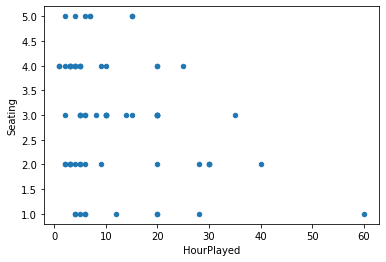

In [18]:
seating_df.plot.scatter(x='HourPlayed', y='Seating')

### Correlation between age and time spent playing Video Games

**__Hypothesis:__**  Younger College Students spent hours per week playing video games.

In [19]:
jason_df = pd.read_csv("responses.csv")

jason_df = jason_df.iloc[:, 74:78]
jason_df = jason_df.rename(columns={'74. How many hours do you play video games in an average week? (PC, console, phone...)': 'HourPlayed', '75. How many hours do you spend watching gaming streams in a week?': 'HourWatched', '76. What genre of games do you play? (Select all that apply)': 'Genre', '77. What is the name of the game you play most?': 'PlayMost'})
jason_df.iloc[:, 0:2] = jason_df.iloc[:, 0:2].replace(to_replace=r'[^\d.]+', value='', regex=True)
jason_df.iloc[:, 0:2] = jason_df.iloc[:, 0:2].replace(to_replace='', value=0)
jason_df.iloc[:, 0:2] = jason_df.iloc[:, 0:2].replace(np.nan, 0)
jason_df.iloc[:, 2:3] = jason_df.iloc[:, 2:3].fillna('None')

age_df = pd.read_csv('responses.csv')
age_df = age_df.iloc[:, 2:3]
age_df = age_df.rename(columns={'2. What is your age?' : 'age'})
age_df = pd.concat([age_df, df], axis=1)
age_df = age_df.iloc[:, 0:3]
jason_df['HourPlayed'] = jason_df['HourPlayed'].astype(float)
jason_df['HourWatched'] = jason_df['HourWatched'].astype(float)
#combine data set from responses, and compare with HourPlayed and HourWatched

Within the age, there was one entry (18-21), that was solved by just taking 20 from the average

In [20]:
age_df.iloc[47:48,0:1] = age_df.iloc[47:48,0:1].replace('18-21','20')

In [21]:
age_df.iloc[:, 0:3] = age_df.iloc[:, 0:3].replace(np.nan, 0)
age_df['age'] = age_df['age'].astype(float)
age_df['HourWatched'] = age_df['HourWatched'].astype(float)
age_df['HourPlayed'] = age_df['HourPlayed'].astype(float)
age_df

age  HourPlayed  HourWatched
0    22.0        15.0         10.0
1    22.0         0.0          0.0
2    27.0        20.0          0.0
3    24.0        20.0          8.0
4    40.0         0.0          0.0
..    ...         ...          ...
105  22.0         0.0          0.0
106  23.0         5.0          0.0
107  19.0        30.0          4.0
108  21.0        28.0          2.0
109  19.0        20.0          1.0

[110 rows x 3 columns]

We want to change the Age Column into our index

In [22]:
new_age_df = age_df.set_index('age')   #making age as index
new_age_df

HourPlayed  HourWatched
age                          
22.0        15.0         10.0
22.0         0.0          0.0
27.0        20.0          0.0
24.0        20.0          8.0
40.0         0.0          0.0
...          ...          ...
22.0         0.0          0.0
23.0         5.0          0.0
19.0        30.0          4.0
21.0        28.0          2.0
19.0        20.0          1.0

[110 rows x 2 columns]

<AxesSubplot:xlabel='age', ylabel='HourWatched'>

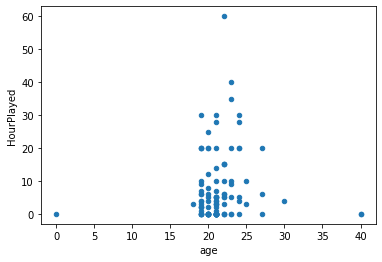

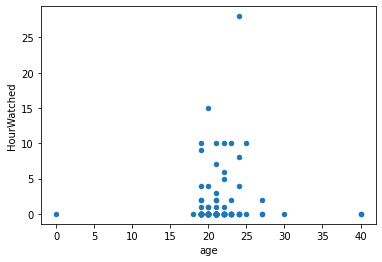

In [23]:
age_df.plot.scatter(x="age", y = "HourPlayed")
age_df.plot.scatter(x="age", y = "HourWatched")

By oberserving the previous graph, we can see that most of the dot are concentrate between age 18-24. They look like that age is directly related to `HourWatched` and `HourPlayed`, but since our data set is taken among 3 CS classes and we are mostly 18-24 years old so the case does not work as they have shown.

In [24]:
h = age_df[["age","HourPlayed","HourWatched"]].corr()
h

age  HourPlayed  HourWatched
age          1.000000    0.060016     0.053445
HourPlayed   0.060016    1.000000     0.433021
HourWatched  0.053445    0.433021     1.000000

<AxesSubplot:>

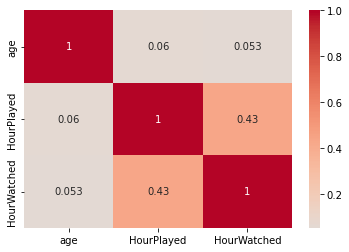

In [25]:
sns.heatmap(h,center=0, cmap = "coolwarm", annot=True)

We can see the correlations between `age` and `HourWatch`, `HourPlayed` are around `0.05`, which indicates a weak positive relationship. 

#### Conducting Chi-Squared Test on Data

The chi-squared test is a hypothesis test used to determine whether there is any significant association between two catergorical variables in the data. In our case, we would like to see if there is any significance between `HourWatched` and `HourPlayed`. Before we can proceed into testing, we must first develop our two hypothesis:

H0: There is **no relationship** between the two variables, and our data is independent

H1: There **is a relationship between the two variables**, and our data is dependent on the other.

In [26]:
age_df

age  HourPlayed  HourWatched
0    22.0        15.0         10.0
1    22.0         0.0          0.0
2    27.0        20.0          0.0
3    24.0        20.0          8.0
4    40.0         0.0          0.0
..    ...         ...          ...
105  22.0         0.0          0.0
106  23.0         5.0          0.0
107  19.0        30.0          4.0
108  21.0        28.0          2.0
109  19.0        20.0          1.0

[110 rows x 3 columns]

In [27]:
Playhours_count = age_df.iloc[:,0:2] #chi-square on HourPlayed and age
Playhours_count.loc['col_total'] = Playhours_count.sum(axis=0)
Playhours_count['row_total'] = Playhours_count.sum(axis=1)
Playhours_count

C:\Users\chai\AppData\Local\Temp\ipykernel_28516\4184475003.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\chai\AppData\Local\Temp\ipykernel_28516\4184475003.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



age  HourPlayed  row_total
0            22.0        15.0       37.0
1            22.0         0.0       22.0
2            27.0        20.0       47.0
3            24.0        20.0       44.0
4            40.0         0.0       40.0
...           ...         ...        ...
106          23.0         5.0       28.0
107          19.0        30.0       49.0
108          21.0        28.0       49.0
109          19.0        20.0       39.0
col_total  2348.0       809.0     3157.0

[111 rows x 3 columns]

In [28]:
expectPlayHour = np.outer(Playhours_count["row_total"][0:111], Playhours_count.loc["col_total"][0:2]) / 3180
expectedPlayHour = pd.DataFrame(expectPlayHour)
expectedPlayHour.columns = ['age','HourPlayed']
expectedPlayHour

age  HourPlayed
0      27.319497    9.412893
1      16.244025    5.596855
2      34.703145   11.956918
3      32.488050   11.193711
4      29.534591   10.176101
..           ...         ...
106    20.674214    7.123270
107    36.179874   12.465723
108    36.179874   12.465723
109    28.796226    9.921698
110  2331.017610  803.148742

[111 rows x 2 columns]

In [29]:
chi_squared_stat1 = (((age_df - expectedPlayHour)**2)/expectedPlayHour).sum().sum()
chi_squared_stat1

830.3359060367851

In [30]:
critical_value = chi2.ppf(q=0.999, df=110)
print("Critical Value:",critical_value)

p_value = 1 - (chi2.cdf(x=chi_squared_stat1, df=110))
print("P Value:", p_value)

Critical Value: 161.58073982908158
P Value: 0.0


In [31]:
Watchhours_count = age_df.loc[:,('age','HourWatched')] #chi-square on HourWatch and age
Watchhours_count.loc['col_total'] = Watchhours_count.sum(axis=0)
Watchhours_count['row_total'] = Watchhours_count.sum(axis=1)
Watchhours_count

age  HourWatched  row_total
0            22.0         10.0       32.0
1            22.0          0.0       22.0
2            27.0          0.0       27.0
3            24.0          8.0       32.0
4            40.0          0.0       40.0
...           ...          ...        ...
106          23.0          0.0       23.0
107          19.0          4.0       23.0
108          21.0          2.0       23.0
109          19.0          1.0       20.0
col_total  2348.0        160.0     2508.0

[111 rows x 3 columns]

In [32]:
expectWatchHour = np.outer(Watchhours_count["row_total"][0:111], Watchhours_count.loc["col_total"][0:2]) / 2531
expectedWatchHour = pd.DataFrame(expectWatchHour)
expectedWatchHour.columns = ['age','HourWatched']
expectedWatchHour


age  HourWatched
0      29.686290     2.022916
1      20.409324     1.390755
2      25.047807     1.706835
3      29.686290     2.022916
4      37.107863     2.528645
..           ...          ...
106    21.337021     1.453971
107    21.337021     1.453971
108    21.337021     1.453971
109    18.553931     1.264322
110  2326.662979   158.546029

[111 rows x 2 columns]

In [33]:
chi_squared_stat2 = (((age_df - expectedWatchHour)**2) / expectedWatchHour).sum().sum()
chi_squared_stat2

666.0874246473343

In [34]:
critical_value = chi2.ppf(q=0.999, df=110)
print("Critical Value:",critical_value)

p_value = 1 - (chi2.cdf(x=chi_squared_stat2, df=110))
print("P Value:", p_value)

Critical Value: 161.58073982908158
P Value: 0.0


Since both of the p value from test `Age` to `HourWatch` and test `Age` to `HourPlayed` are 0, which indicates that we should reject the null hypothesis. Age is independent to HourWatched and HourPlayed.

### Correlation between Time Spent Playing Video Games and Time Spent Socializing with friends on Campus.

**__Hypothesis:__** The more time a college student spends playing video games, the less time they spend socializing with friends on campus. 

**__Null Hypothesis:__** The time a college student spends playing video games does not have an effect on the time they socialize with friends on campus. 

In [35]:
ayu_df = pd.read_csv('responses.csv')
ayu_df = ayu_df.iloc[:, [74, 79]]

ayu_df = ayu_df.rename(columns={'74. How many hours do you play video games in an average week? (PC, console, phone...)' : 'Hours Playing Video Games'})
ayu_df = ayu_df.rename(columns={'79. From the people that you have met on campus, how many hours per week do you socialize with them outside of class? (i.e. studying, eating, exercising, lounging, etc.)' : 'Hours Spent Socializing'})
ayu_df = ayu_df.apply(pd.to_numeric, errors='coerce').dropna()
ayu_df['Hours Spent Socializing'] = ayu_df['Hours Spent Socializing'].astype(float)
ayu_df['Hours Playing Video Games'] = ayu_df['Hours Playing Video Games'].astype(float)
ayu_df.head(5)

Hours Playing Video Games  Hours Spent Socializing
0                       15.0                      1.0
1                        0.0                      8.0
2                       20.0                      0.0
3                       20.0                     20.0
4                        0.0                      0.0

In [36]:
ayu_df = ayu_df.iloc[:, 0:2]

avg_soc = ayu_df[['Hours Playing Video Games', 'Hours Spent Socializing']].mean()
avg_soc


Hours Playing Video Games    8.096774
Hours Spent Socializing      7.951613
dtype: float64

In [37]:
video_games = ayu_df['Hours Playing Video Games']
socializing = ayu_df['Hours Spent Socializing']
video_games.corr(socializing)

-0.06217449048754592

We have a slight negative correlation value, indicating that the two data sets are inversely related, supporting our hypothesis. 

In [38]:
r = stats.pearsonr(ayu_df['Hours Playing Video Games'], ayu_df['Hours Spent Socializing'])
print(r)

(-0.06217449048754589, 0.5538150740158561)


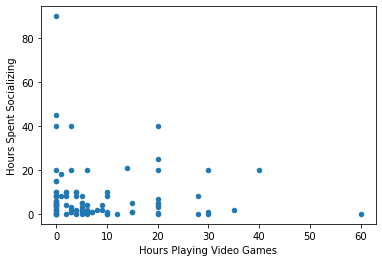

In [39]:
ayu_df.plot.scatter(x = 'Hours Playing Video Games', y = 'Hours Spent Socializing');

The scatter plot above shows the hours studnets spent playing video games per week vs the hours they spent socializing with friends per week. We notice a slight inverse relationship between the two. As the number of hours spent socializing grew, the hours spent playing video games decreased and vice versa. 

In [40]:
chi_squared = pd.crosstab(ayu_df['Hours Playing Video Games'], ayu_df['Hours Spent Socializing'])
c, p, dof, expected = chi2_contingency(chi_squared)
p

0.6743735095515774

### Correlation between Time Spent Playing and Watching Video Game Streams per week

**__Hypothesis:__** The time spent per week playing video games will correlate with the amount of time spent watching streams of video games being played.

**__Reasoning__**: We think that playing video games and watching video games should go in hand.  In the instance where the video game is a PvP (Player vs Player) situation, some people like to watch streams of much better players in order to emulate their abilities towards their own style.  Watching video games streams also allows the viewer to enjoy the video game without actually playing it and having to make their own decisions.

In [41]:
chai_df = pd.read_csv('responses.csv')

chai_df = chai_df.iloc[:, 74:76]
chai_df = chai_df.rename(columns={'74. How many hours do you play video games in an average week? (PC, console, phone...)': 'HourPlayed', '75. How many hours do you spend watching gaming streams in a week?': 'HourWatched'})
chai_df.iloc[:, 0:2] = chai_df.iloc[:, 0:2].replace(to_replace=r'[^\d.]+', value='', regex=True)
chai_df.iloc[:, 0:2] = chai_df.iloc[:, 0:2].replace(to_replace='', value=0)
chai_df.iloc[:, 0:2] = chai_df.iloc[:, 0:2].replace(np.nan, 0)
chai_df.iloc[:, 2:3] = chai_df.iloc[:, 2:3].fillna('None')

chai_df.head(5)

HourPlayed HourWatched
0         15          10
1          0           0
2         20           0
3         20           8
4          0           0

#### Average Time Spent Playing and Watching Video Game Streams per week

In [42]:
chai_df['HourPlayed'] = chai_df['HourPlayed'].astype(float)
chai_df['HourWatched'] = chai_df['HourWatched'].astype(float)

avg_hours = chai_df[['HourPlayed', 'HourWatched']].mean()

avg_hours

HourPlayed     7.354545
HourWatched    1.454545
dtype: float64

Here, we note that the average time spent playing video games is nearly 4x the time spent watching video game streams.

<AxesSubplot:>

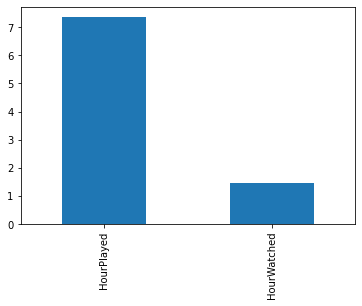

In [43]:
avg_hours.plot.bar()

However, it's important to note that this information considers **all** responses, even those where students put 0 for both `HourWatched` and `HourPlayed` as evident below.  Let's look at the average when we drop those values!

Drop our values by seeing if all rows are equal to 0 (We are only looking at `HoursWatched` and `HoursPlayed`).  Why exactly are we dropping this?  Since we are trying to find the correlation of whether playing video games leads to watching video games, it becomes redudant to have information when a student does **neither** of the things.  Without dropping our zero values, there is correlation without stipulation.

In [44]:
chai_df = chai_df.loc[~(chai_df==0).all(axis=1)]

chai_df.head(5)

HourPlayed  HourWatched
0        15.0         10.0
2        20.0          0.0
3        20.0          8.0
7         3.0          0.0
9         5.0          0.0

After dropping our zero values, we see that the average hours shifts from 7.35 and 1.45 to 11.56 and 2.29 respectively.  Note, that if we wanted to garner a poll of whether students play and watch video games, it would make sense to leave our zero values in.  However, we are more interested in students with non-zero responses to either hours spent playing, or hours spent watching.

In [45]:
avg_hours = chai_df[['HourPlayed', 'HourWatched']].mean()

avg_hours

HourPlayed     11.557143
HourWatched     2.285714
dtype: float64

<AxesSubplot:>

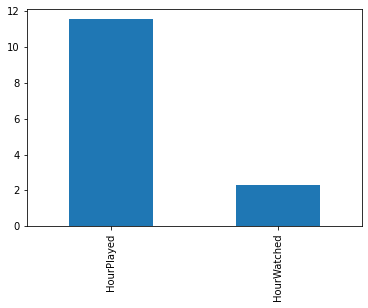

In [46]:
avg_hours.plot.bar()

#### Conducting Correlation Between Hours spent Watching Streams and Hours Spent Playing Games

In [47]:
corr1 = chai_df['HourWatched']
corr2 = chai_df['HourPlayed']

print("Correlation Coefficient:",corr2.corr(corr1))

Correlation Coefficient: 0.34539032240649753


<AxesSubplot:>

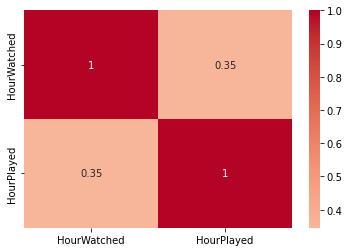

In [48]:
hours_correlation = df[['HourWatched', 'HourPlayed']].corr()

sns.heatmap(hours_correlation, center=0, cmap="coolwarm", annot=True)

So, with a correlation coefficient of `0.345`, we can see that there is some positive correlation (albeit low) between Hours spent watching Streams versus Hours spent playing Games.  At this point, there is nearly a neglible correlation between the two, but we can save that for until we do our Chi-Squared Test on our Data

#### Conducting Chi-Squared Test on Data

In our case, we would like to see if there is any significance between `HourWatched` and `HourPlayed`.  Before we can proceed into testing, we must first develop our two hypothesis:

* H0: There is **no relationship** between the two variables, and our data is independent
* H1: There **is a relationship** between the two variables, and our data is dependent on the other.


Before we begin, we need to create a smaller subset of data that disregards NaNs and only pays attention to those variables.  After that, we calculate the row and column totals for each

In [49]:
observed = chai_df.copy()
observed

HourPlayed  HourWatched
0          15.0         10.0
2          20.0          0.0
3          20.0          8.0
7           3.0          0.0
9           5.0          0.0
..          ...          ...
104        10.0          0.0
106         5.0          0.0
107        30.0          4.0
108        28.0          2.0
109        20.0          1.0

[70 rows x 2 columns]

In [50]:
hours_count = observed.copy()
hours_count.loc['col_total'] = hours_count.sum(axis=0)
hours_count['row_total'] = hours_count.sum(axis=1)
hours_count

HourPlayed  HourWatched  row_total
0                15.0         10.0       25.0
2                20.0          0.0       20.0
3                20.0          8.0       28.0
7                 3.0          0.0        3.0
9                 5.0          0.0        5.0
...               ...          ...        ...
106               5.0          0.0        5.0
107              30.0          4.0       34.0
108              28.0          2.0       30.0
109              20.0          1.0       21.0
col_total       809.0        160.0      969.0

[71 rows x 3 columns]

In order to create our expected table, we need to multiply the row total to the colum total and divide by the total number of observations for a cell to get our expected count.  We can do this utilizing the `np.outer()` function in order to get those totals.  Then, we can divide the outputs by the true total, which in this case is `969`.

In [51]:
expected = np.outer(hours_count["row_total"][0:70], hours_count.loc["col_total"][0:2]) / 969

expected = pd.DataFrame(expected)

expected.columns = ['HourPlayed', 'HourWatched']

expected

HourPlayed  HourWatched
0    20.872033     4.127967
1    16.697626     3.302374
2    23.376677     4.623323
3     2.504644     0.495356
4     4.174407     0.825593
..         ...          ...
65    8.348813     1.651187
66    4.174407     0.825593
67   28.385965     5.614035
68   25.046440     4.953560
69   17.532508     3.467492

[70 rows x 2 columns]

**Creating Chi-Squared Statistic**

After calculating our expected table, we can then calculate the chi-square static value with the below formula.

In [52]:
chi_squared_stat = (((observed - expected)**2) / expected).sum().sum()
print("Chi-Squared static value:",chi_squared_stat)

Chi-Squared static value: 2166.033316451384


We can figure out our critical values and p-values.  In the case of our experiment, we are utilizing a Confidence Rate of 99.9%.  Our table is currently 70 x 2, therefore our degrees of freedom will be 69 (as 69 x 1).

In [53]:
critical_value = chi2.ppf(q=0.999, df=69)
print("Critical Value:",critical_value)

p_value = 1 - (chi2.cdf(x=chi_squared_stat, df=69))
print("P Value:", p_value)

Critical Value: 111.05506556267146
P Value: 0.0


Based on the heatmap, we already knew that there is a low positive correlation between the hours spent watching versus the hour spent playing video games.  However, a correlation near 30% is subject to potentially being negligible!  Since our p-value of 0.00 is less than the required threshold of 0.001, we can reject the null hypothesis and claim that there is some correlation between Hours Spent Watching Video Games and Hours Spent Playing Video Games

## Question 4 - What are you Hypothesis?
* The time spent per week streaming videos such as youtube or netflix will correlate with the amount of time per week spent playing video games.
* The further back you sit in a classroom, the more time you spend playing video games.
* The more time a college student spends playing video games, the less time they spend socializing with friends on campus.
* Younger College Students spent hours per week playing video games.
* The time spent per week playing video games will correlate with the amount of time spent watching streams of video games being played.

(Note, that the hypothesis were repeated in their respective sections)

## Question 5 - Test your Hypothesis

All questions and hypothesis were tested within their respective sections during question 3, with `name_df` to denote which member worked on each question and came to their own conclusions.

## Verify Effectiveness of Chi-Squared and Correlation Tests

A toy data set was utilized and documented in `correlation_calculations.ipynb`.  These calculations were done by a member on python, then verified on hand in the supporting `hand_calculations.pdf`.